### First neural network in keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Link to dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 
<br>
Link to blog -


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('data/train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Normalized data:')
print(X_train[0])
print(X_test[0])

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Normalized data:
[-0.5390358   1.02589061 -1.26199175 -1.01793865  1.78495109 -1.0327585
  1.70200842  0.69159324  1.11448677  1.5240457   1.34736843  1.98951834
  1.16224611  1.51509727 -0.32332484 -1.09870945 -0.73208384 -1.77142063
 -1.00333891  0.99115027]
[ 0.49007136  1.02589061 -1.26199175  0.98237747 -0.758373   -1.0327585
  0.11029193  0.69159324 -1.61046602 -0.23362354 -1.13465024 -0.89856997
 -0.51391173  1.21460218 -1.27622653 -0.18407099 -1.09746604  0.56451866
  0.9966722  -1.00892875]


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [8]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 1.4245 - accuracy: 0.2644
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3655 - accuracy: 0.3139
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3147 - accuracy: 0.3722
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2590 - accuracy: 0.4278
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1960 - accuracy: 0.4783
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1220 - accuracy: 0.5139
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0444 - accuracy: 0.5583
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9642 - accuracy: 0.5900
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.6294
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.6628
Epoch 11/

In [11]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

7/7 [==============================] - 0s 3ms/step


In [12]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [13]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 94.5


In [14]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 22ms/step - loss: 0.0446 - accuracy: 0.9944 - val_loss: 0.1371 - val_accuracy: 0.9450
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9939 - val_loss: 0.1399 - val_accuracy: 0.9400
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9939 - val_loss: 0.1526 - val_accuracy: 0.9400
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9950 - val_loss: 0.1383 - val_accuracy: 0.9350
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9944 - val_loss: 0.1455 - val_accuracy: 0.9450
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9944 - val_loss: 0.1436 - val_accuracy: 0.9450
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9911 - val_loss: 0.1388 - val_accuracy: 0.9350
Epoch 8/100


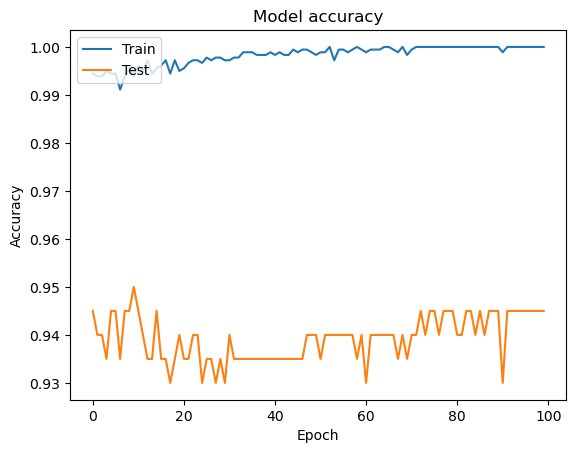

In [17]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

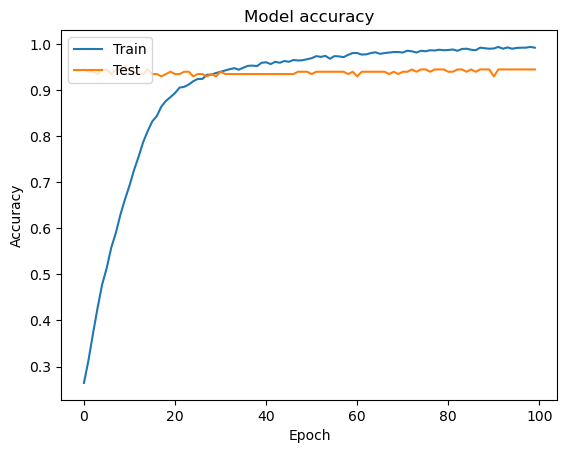

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

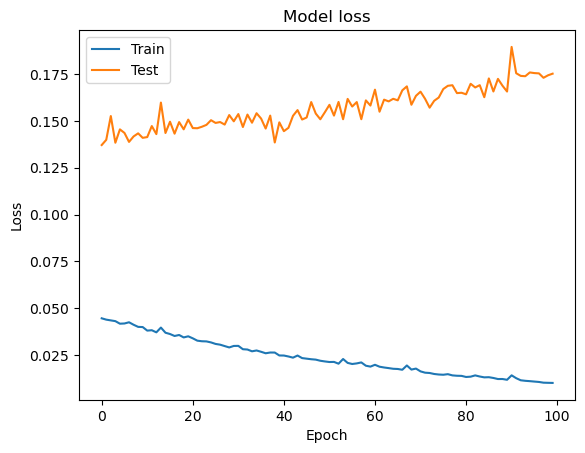

In [18]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

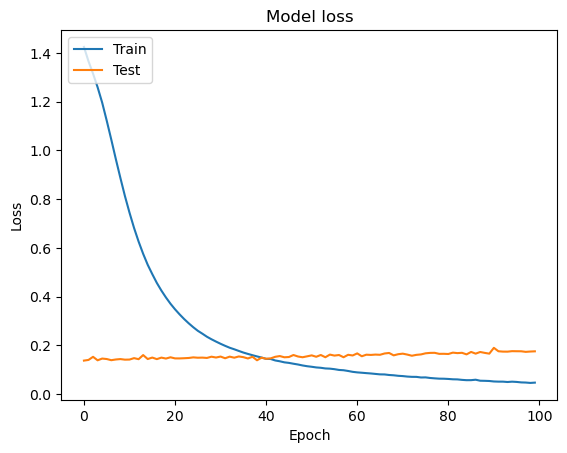

In [19]:
plt.plot(history.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()